In [1]:
import os
import json
import pandas as pd
import numpy as np
import tqdm
import scipy.sparse as sp
from matplotlib import pyplot as plt
import seaborn as sns
import mglearn
%matplotlib inline
from IPython.display import display
from pprint import pprint
pd.set_option('display.max_columns', 50)
DATA_PATH = 'D:\download'
transactions = pd.read_csv(
    os.path.join(DATA_PATH, 'transactions.csv'),
    dtype={
        'element_uid': np.uint16,
        'user_uid': np.uint32,
        'consumption_mode': 'category',
        'ts': np.float64,
        'watched_time': np.uint64,
        'device_type': np.uint8,
        'device_manufacturer': np.uint8
    }
)



transactions_exp = pd.read_csv(
    os.path.join(DATA_PATH, 'transactions_exp.csv'),
    
)


ratings = pd.read_csv(
    os.path.join(DATA_PATH, 'ratings.csv'),
    dtype={
        'element_uid': np.uint16,
        'user_uid': np.uint32,
        'ts': np.float64,
        'rating': np.uint8
    }
)


%%time
bookmarks = pd.read_csv(
    os.path.join(DATA_PATH, 'bookmarks.csv'),
    dtype={
        'element_uid': np.uint16,
        'user_uid': np.uint32,
        'ts': np.float64
    }
)
bookmarks.head()
from collections import Counter
catal=pd.read_json(os.path.join(DATA_PATH, 'catalogue.json'), orient='index') 


timetr=pd.read_csv(os.path.join(DATA_PATH, 'timetr.csv'))

UsageError: Line magic function `%%time` not found.


In [4]:

bookmarks = pd.read_csv(
    os.path.join(DATA_PATH, 'bookmarks.csv'),
    dtype={
        'element_uid': np.uint16,
        'user_uid': np.uint32,
        'ts': np.float64
    }
)
bookmarks.head()
from collections import Counter
catal=pd.read_json(os.path.join(DATA_PATH, 'catalogue.json'), orient='index') 


timetr=pd.read_csv(os.path.join(DATA_PATH, 'timetr.csv'))

In [ ]:

plt.figure(figsize=(12, 8))

plt.hist(trtr['watched_time'], 40, color='blue')


plt.grid()
plt.show()

plt.scatter(trtr['watched_time'],
            trtr['rating'])


(transactions_exp1.isnull().sum()/transactions_exp1.shape[0]).plot(kind='bar');

In [33]:
transactions_exp = pd.read_csv(
    os.path.join(DATA_PATH, 'transactions_exp.csv'),
    
)
transactions_exp.head()

,Unnamed: 0,Unnamed: 0.1,element_uid,user_uid,watched_time,rating,duration,feature_1,feature_2,feature_3,...,feature_5_-1,feature_5_44,smallf3,middlef3,bigf3,type_m,type_s,type_mm,longfilm,shortfilm
0,0,0,3336,5177,0.792963,9.0,90,4.166108e+07,0.739609,45,...,0,0,0,0,1,1,0,0,0,0
1,1,1,3336,349202,0.609444,NaN,90,4.166108e+07,0.739609,45,...,0,0,0,0,1,1,0,0,0,0
2,2,2,3336,117582,1.060556,NaN,90,4.166108e+07,0.739609,45,...,0,0,0,0,1,1,0,0,0,0
3,3,3,3336,523833,0.804815,NaN,90,4.166108e+07,0.739609,45,...,0,0,0,0,1,1,0,0,0,0
4,4,4,3336,571064,0.845926,NaN,90,4.166108e+07,0.739609,45,...,0,0,0,0,1,1,0,0,0,0


In [91]:
timetr.head()

,element_uid,user_uid,ts-f1,minus
0,3336,5177,108.010646,0
1,3336,349202,108.004379,0
2,3336,117582,107.998408,0
3,3336,523833,107.996627,0
4,3336,571064,107.988755,0


In [6]:
timetr=timetr.drop(['Unnamed: 0', 'ts', 'feature_1'], 1)

In [92]:
transactions_exp=transactions_exp.drop(['Unnamed: 0', 'Unnamed: 0.1', 'feature_1'], 1)
transactions_exp=pd.merge(transactions_exp,timetr, how='left', on=['element_uid', 'user_uid'])

In [36]:
transactions_exp.head()

,element_uid,user_uid,watched_time,rating,duration,feature_2,feature_3,feature_4,quantity,rating_mean,...,smallf3,middlef3,bigf3,type_m,type_s,type_mm,longfilm,shortfilm,ts-f1,minus
0,3336,5177,0.792963,9.0,90,0.739609,45,1.141929,45646,8.328548,...,0,0,1,1,0,0,0,0,108.010646,0
1,3336,349202,0.609444,NaN,90,0.739609,45,1.141929,45646,8.328548,...,0,0,1,1,0,0,0,0,108.004379,0
2,3336,117582,1.060556,NaN,90,0.739609,45,1.141929,45646,8.328548,...,0,0,1,1,0,0,0,0,107.998408,0
3,3336,523833,0.804815,NaN,90,0.739609,45,1.141929,45646,8.328548,...,0,0,1,1,0,0,0,0,107.996627,0
4,3336,571064,0.845926,NaN,90,0.739609,45,1.141929,45646,8.328548,...,0,0,1,1,0,0,0,0,107.988755,0


In [42]:
transactions_exp=transactions_exp.drop(['watched_time',  
'rating',         
'duration',     
'feature_2',
'feature_3',
'feature_4',
'quantity',
'rating_mean',
'CM_S',
'CM_P',
'CM_R',
'feature_5_65',
'feature_5_00',
'feature_5_68',
'feature_5_59',
'feature_5_-1',
'feature_5_44',
'smallf3',
'middlef3',
'bigf3',
'type_m',
'type_s' ,
'type_mm',
'longfilm',
'shortfilm',
'ts-f1',
'minus'],1)
                                       

In [44]:
transactions_exp.to_csv(os.path.join(DATA_PATH, 'transactions_to_implicit(without_series).csv'))

In [90]:
del transactions_exp
transactions_exp = pd.read_csv(
    os.path.join(DATA_PATH, 'transactions_exp.csv'),
    
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9643012 entries, 0 to 9643011
Data columns (total 30 columns):
Unnamed: 0      int64
Unnamed: 0.1    int64
element_uid     int64
user_uid        int64
watched_time    float64
rating          float64
duration        int64
feature_1       float64
feature_2       float64
feature_3       int64
feature_4       float64
quantity        int64
rating_mean     float64
CM_S            int64
CM_P            int64
CM_R            int64
feature_5_65    int64
feature_5_00    int64
feature_5_68    int64
feature_5_59    int64
feature_5_-1    int64
feature_5_44    int64
smallf3         int64
middlef3        int64
bigf3           int64
type_m          int64
type_s          int64
type_mm         int64
longfilm        int64
shortfilm       int64
dtypes: float64(6), int64(24)
memory usage: 2.2 GB


In [93]:
transactions_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9643012 entries, 0 to 9643011
Data columns (total 29 columns):
element_uid     int64
user_uid        int64
watched_time    float64
rating          float64
duration        int64
feature_2       float64
feature_3       int64
feature_4       float64
quantity        int64
rating_mean     float64
CM_S            int64
CM_P            int64
CM_R            int64
feature_5_65    int64
feature_5_00    int64
feature_5_68    int64
feature_5_59    int64
feature_5_-1    int64
feature_5_44    int64
smallf3         int64
middlef3        int64
bigf3           int64
type_m          int64
type_s          int64
type_mm         int64
longfilm        int64
shortfilm       int64
ts-f1           float64
minus           int64
dtypes: float64(6), int64(23)
memory usage: 2.2 GB


In [94]:
transactions_ser=transactions_exp[transactions_exp.type_s == 1]
transactions_mov=transactions_exp[transactions_exp.type_m == 1]
transactions_mm=transactions_exp[transactions_exp.type_mm == 1]

In [99]:
transactions_ser=transactions_ser.replace([np.inf], np.nan)
transactions_ser.watched_time=transactions_ser.watched_time.fillna(1.0)

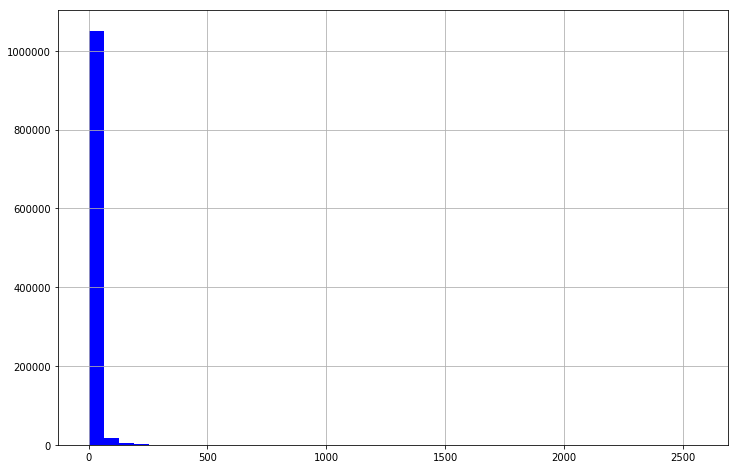

In [100]:

plt.figure(figsize=(12, 8))

plt.hist(transactions_ser['watched_time'], 40, color='blue')


plt.grid()
plt.show()


In [102]:
len(pd.unique(transactions_ser.element_uid))

823

In [104]:
DF=pd.merge(transactions_exp,transactions, how='left', on=['element_uid', 'user_uid'])

In [105]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9643012 entries, 0 to 9643011
Data columns (total 34 columns):
element_uid            int64
user_uid               int64
watched_time_x         float64
rating                 float64
duration               int64
feature_2              float64
feature_3              int64
feature_4              float64
quantity               int64
rating_mean            float64
CM_S                   int64
CM_P                   int64
CM_R                   int64
feature_5_65           int64
feature_5_00           int64
feature_5_68           int64
feature_5_59           int64
feature_5_-1           int64
feature_5_44           int64
smallf3                int64
middlef3               int64
bigf3                  int64
type_m                 int64
type_s                 int64
type_mm                int64
longfilm               int64
shortfilm              int64
ts-f1                  float64
minus                  int64
consumption_mode       category
ts

In [108]:
#catal['element_uid']=catal.index
catal=catal.drop(['duration', 'type', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5'],1)
catal.head()

,attributes,availability,element_uid
0,"[31115, 6713, 10906, 31116, 31117, 270, 24431,...",[],0
1,"[2786, 385, 2799, 3730, 886, 7, 11700, 42, 20,...","[purchase, rent]",1
10,"[10511, 2752, 9076, 1373, 472, 7, 10512, 42, 4...",[],10
100,"[18441, 16300, 16580, 18770, 18771, 18643, 396...","[purchase, rent]",100
1000,"[1256, 441, 19806, 15224, 16708, 83, 336, 1980...",[],1000


In [110]:
catal=catal.reset_index()
catal.head()

,index,attributes,availability,element_uid
0,0,"[31115, 6713, 10906, 31116, 31117, 270, 24431,...",[],0
1,1,"[2786, 385, 2799, 3730, 886, 7, 11700, 42, 20,...","[purchase, rent]",1
2,10,"[10511, 2752, 9076, 1373, 472, 7, 10512, 42, 4...",[],10
3,100,"[18441, 16300, 16580, 18770, 18771, 18643, 396...","[purchase, rent]",100
4,1000,"[1256, 441, 19806, 15224, 16708, 83, 336, 1980...",[],1000


In [111]:
catal=catal.drop(['index'], 1)
DF=pd.merge(DF,catal, how='left', on=['element_uid'])

In [112]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9643012 entries, 0 to 9643011
Data columns (total 36 columns):
element_uid            int64
user_uid               int64
watched_time_x         float64
rating                 float64
duration               int64
feature_2              float64
feature_3              int64
feature_4              float64
quantity               int64
rating_mean            float64
CM_S                   int64
CM_P                   int64
CM_R                   int64
feature_5_65           int64
feature_5_00           int64
feature_5_68           int64
feature_5_59           int64
feature_5_-1           int64
feature_5_44           int64
smallf3                int64
middlef3               int64
bigf3                  int64
type_m                 int64
type_s                 int64
type_mm                int64
longfilm               int64
shortfilm              int64
ts-f1                  float64
minus                  int64
consumption_mode       category
ts

In [113]:
DF['feature_5_65']=DF['feature_5_65'].astype(np.int16)
DF['feature_5_00']=DF['feature_5_00'].astype(np.int16)
DF['feature_5_68']=DF['feature_5_68'].astype(np.int16)
DF['feature_5_59']=DF['feature_5_59'].astype(np.int16)
DF['feature_5_-1']=DF['feature_5_-1'].astype(np.int16)
DF['smallf3']= DF['smallf3'].astype(np.int16)
DF['middlef3']=DF['middlef3'].astype(np.int16)
DF['bigf3']=DF['bigf3'].astype(np.int16)
DF['CM_S']=DF['CM_S'].astype(np.int16)
DF['CM_P']=DF['CM_P'].astype(np.int16)
DF['CM_R']=DF['CM_R'].astype(np.int16)
DF['minus']=DF['minus'].astype(np.int16)
DF['feature_5_44']=DF['feature_5_44'].astype(np.int16)
DF['type_m']=DF['type_m'].astype(np.int16)

DF['type_s']=DF['type_s'].astype(np.int16)

DF['type_mm']= DF['type_mm'].astype(np.int16)

DF['feature_3']=DF['feature_3'].astype(np.int16)

DF['duration']=DF['duration'].astype(np.int16)

DF['element_uid']=DF['element_uid'].astype(np.int32)
DF['user_uid']=DF['user_uid'].astype(np.int32)
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9643012 entries, 0 to 9643011
Data columns (total 36 columns):
element_uid            int32
user_uid               int32
watched_time_x         float64
rating                 float64
duration               int16
feature_2              float64
feature_3              int16
feature_4              float64
quantity               int64
rating_mean            float64
CM_S                   int64
CM_P                   int64
CM_R                   int64
feature_5_65           int16
feature_5_00           int16
feature_5_68           int16
feature_5_59           int16
feature_5_-1           int16
feature_5_44           int64
smallf3                int16
middlef3               int16
bigf3                  int16
type_m                 int16
type_s                 int16
type_mm                int16
longfilm               int64
shortfilm              int64
ts-f1                  float64
minus                  int64
consumption_mode       category
ts

In [114]:
DF['CM_S']=DF['CM_S'].astype(np.int16)
DF['CM_P']=DF['CM_P'].astype(np.int16)
DF['CM_R']=DF['CM_R'].astype(np.int16)
DF['minus']=DF['minus'].astype(np.int16)
DF['feature_5_44']=DF['feature_5_44'].astype(np.int16)

In [115]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9643012 entries, 0 to 9643011
Data columns (total 36 columns):
element_uid            int32
user_uid               int32
watched_time_x         float64
rating                 float64
duration               int16
feature_2              float64
feature_3              int16
feature_4              float64
quantity               int64
rating_mean            float64
CM_S                   int16
CM_P                   int16
CM_R                   int16
feature_5_65           int16
feature_5_00           int16
feature_5_68           int16
feature_5_59           int16
feature_5_-1           int16
feature_5_44           int16
smallf3                int16
middlef3               int16
bigf3                  int16
type_m                 int16
type_s                 int16
type_mm                int16
longfilm               int64
shortfilm              int64
ts-f1                  float64
minus                  int16
consumption_mode       category
ts

In [116]:
transactions_ser=DF[DF.type_s == 1]
transactions_mov=DF[DF.type_m == 1]
transactions_mm=DF[DF.type_mm == 1]

In [120]:
transactions_ser=transactions_ser.drop(['type_s', 'type_m', 'type_mm', 'shortfilm', 'longfilm'],1)

In [136]:
pd.set_option('display.max_columns', 50)
transactions_ser.head(30000)

,element_uid,user_uid,watched_time_x,rating,duration,feature_2,feature_3,feature_4,quantity,rating_mean,CM_S,CM_P,CM_R,feature_5_65,feature_5_00,feature_5_68,feature_5_59,feature_5_-1,feature_5_44,smallf3,middlef3,bigf3,ts-f1,minus,consumption_mode,ts,watched_time_y,device_type,device_manufacturer,attributes,availability
99799,5651,490059,7.825000,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.900432,0,S,4.430518e+07,9390,0,50,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",[]
99800,5651,278741,1.166667,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.834638,0,S,4.430357e+07,1400,0,99,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",[]
99801,5651,469687,5.044167,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.707670,0,S,4.430046e+07,6053,0,11,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",[]
99802,5651,371512,1.880000,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.692953,0,S,4.430010e+07,2256,0,50,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",[]
99803,5651,566802,2.121667,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.555914,0,S,4.429674e+07,2546,0,11,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",[]
99804,5651,521134,13.178333,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.403169,0,S,4.429301e+07,15814,0,50,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",[]
99805,5651,32629,1.030000,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.322495,0,S,4.429103e+07,1236,0,50,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",[]
99806,5651,205667,0.866667,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.316584,0,S,4.429089e+07,1040,0,50,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",[]
99807,5651,49643,18.082500,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.260840,0,S,4.428952e+07,21699,0,50,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",[]
99808,5651,131982,0.177500,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.224088,0,S,4.428862e+07,213,0,11,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",[]


In [146]:
tran=transactions_ser  
tran['availability']=tran['availability'].astype(str)
tran['availability'].replace(regex=True,inplace=True,to_replace=r'[[]]',value=r'')

In [147]:
tran.head(30000)

,element_uid,user_uid,watched_time_x,rating,duration,feature_2,feature_3,feature_4,quantity,rating_mean,CM_S,CM_P,CM_R,feature_5_65,feature_5_00,feature_5_68,feature_5_59,feature_5_-1,feature_5_44,smallf3,middlef3,bigf3,ts-f1,minus,consumption_mode,ts,watched_time_y,device_type,device_manufacturer,attributes,availability
99799,5651,490059,7.825000,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.900432,0,S,4.430518e+07,9390,0,50,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",
99800,5651,278741,1.166667,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.834638,0,S,4.430357e+07,1400,0,99,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",
99801,5651,469687,5.044167,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.707670,0,S,4.430046e+07,6053,0,11,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",
99802,5651,371512,1.880000,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.692953,0,S,4.430010e+07,2256,0,50,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",
99803,5651,566802,2.121667,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.555914,0,S,4.429674e+07,2546,0,11,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",
99804,5651,521134,13.178333,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.403169,0,S,4.429301e+07,15814,0,50,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",
99805,5651,32629,1.030000,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.322495,0,S,4.429103e+07,1236,0,50,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",
99806,5651,205667,0.866667,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.316584,0,S,4.429089e+07,1040,0,50,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",
99807,5651,49643,18.082500,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.260840,0,S,4.428952e+07,21699,0,50,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",
99808,5651,131982,0.177500,NaN,20,0.677350,0,1.138604,3444,9.000000,1,0,0,1,0,0,0,0,0,1,0,0,96.224088,0,S,4.428862e+07,213,0,11,"[8165, 35309, 35310, 20267, 270, 34399, 43, 25]",


In [148]:
Counter(tran.availability)

Counter({'': 201019,
         "['purchase' 'subscription']": 523454,
         "['subscription']": 318993,
         "['purchase']": 32686})

In [149]:
dct1={'':1, "['purchase' 'subscription']":2, "['subscription']":3, "['purchase']":4 }
tran['availability']=tran['availability'].map(dct1)

In [151]:
Counter(tran.availability)

Counter({1: 201019, 2: 523454, 3: 318993, 4: 32686})

In [152]:
tran['AV_non']=tran['availability'].map(lambda x: 1 if x == 1 else 0)
tran['AV_S+P']=tran['availability'].map(lambda x: 1 if x == 2 else 0)
tran['AV_S']=tran['availability'].map(lambda x: 1 if x == 3 else 0)
tran['AV_P']=tran['availability'].map(lambda x: 1 if x == 4 else 0)

In [155]:
tran=tran.drop(['availability'], 1)

In [158]:
tran=tran.drop(['consumption_mode'], 1)

In [159]:
tran.to_csv(os.path.join(DATA_PATH, 'transactions_alldataseries.csv'))

In [168]:

tran['attributes']=tran['attributes'].astype(str)
#tran['attributes'].replace(regex=True,inplace=True,to_replace=r'[[]]',value=r'')

In [171]:
tran=tran.drop(['attributes'],1)

In [172]:
tran.head()

,element_uid,user_uid,watched_time_x,rating,duration,feature_2,feature_3,feature_4,quantity,rating_mean,CM_S,CM_P,CM_R,feature_5_65,feature_5_00,feature_5_68,feature_5_59,feature_5_-1,feature_5_44,smallf3,middlef3,bigf3,ts-f1,minus,ts,watched_time_y,device_type,device_manufacturer,AV_non,AV_S+P,AV_S,AV_P
99799,5651,490059,7.825000,NaN,20,0.67735,0,1.138604,3444,9.0,1,0,0,1,0,0,0,0,0,1,0,0,96.900432,0,4.430518e+07,9390,0,50,1,0,0,0
99800,5651,278741,1.166667,NaN,20,0.67735,0,1.138604,3444,9.0,1,0,0,1,0,0,0,0,0,1,0,0,96.834638,0,4.430357e+07,1400,0,99,1,0,0,0
99801,5651,469687,5.044167,NaN,20,0.67735,0,1.138604,3444,9.0,1,0,0,1,0,0,0,0,0,1,0,0,96.707670,0,4.430046e+07,6053,0,11,1,0,0,0
99802,5651,371512,1.880000,NaN,20,0.67735,0,1.138604,3444,9.0,1,0,0,1,0,0,0,0,0,1,0,0,96.692953,0,4.430010e+07,2256,0,50,1,0,0,0
99803,5651,566802,2.121667,NaN,20,0.67735,0,1.138604,3444,9.0,1,0,0,1,0,0,0,0,0,1,0,0,96.555914,0,4.429674e+07,2546,0,11,1,0,0,0


In [174]:
Counter(tran.device_type)

Counter({0: 838148, 3: 91104, 5: 72652, 4: 26433, 1: 45284, 6: 2531})

In [177]:
tran['DEV0']=tran['device_type'].map(lambda x: 1 if x == 0 else 0)
tran['DEV1']=tran['device_type'].map(lambda x: 1 if x == 1 else 0)
tran['DEV3']=tran['device_type'].map(lambda x: 1 if x == 3 else 0)
tran['DEV4']=tran['device_type'].map(lambda x: 1 if x == 4 else 0)
tran['DEV5']=tran['device_type'].map(lambda x: 1 if x == 5 else 0)
tran['DEV6']=tran['device_type'].map(lambda x: 1 if x == 6 else 0)
tran=tran.drop(['device_type'], 1)

In [178]:
tran=tran.drop(['ts', 'device_manufacturer', 'AV_non', 'AV_S+P', 'AV_S', 'AV_P'], 1)

In [184]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1076152 entries, 99799 to 9642999
Data columns (total 31 columns):
element_uid       1076152 non-null int32
user_uid          1076152 non-null int32
watched_time_x    1072866 non-null float64
rating            7393 non-null float64
duration          1076152 non-null int16
feature_2         1076152 non-null float64
feature_3         1076152 non-null int16
feature_4         1076152 non-null float64
quantity          1076152 non-null int64
rating_mean       1051603 non-null float64
CM_S              1076152 non-null int16
CM_P              1076152 non-null int16
CM_R              1076152 non-null int16
feature_5_65      1076152 non-null int16
feature_5_00      1076152 non-null int16
feature_5_68      1076152 non-null int16
feature_5_59      1076152 non-null int16
feature_5_-1      1076152 non-null int16
feature_5_44      1076152 non-null int16
smallf3           1076152 non-null int16
middlef3          1076152 non-null int16
bigf3          

In [183]:
tran[tran.watched_time_x[tran.minus==1] > 10] = tran[tran.watched_time_x[tran.minus==1] > 10].fillna(10.0)
tran[tran.watched_time_x[tran.minus==1] > 5] = tran[tran.watched_time_x[tran.minus==1] > 5].fillna(8.0)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [185]:
tran.to_csv(os.path.join(DATA_PATH, 'transactions_series_toregress.csv'))

In [186]:
transactions_mm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118932 entries, 462482 to 9642121
Data columns (total 36 columns):
element_uid            118932 non-null int32
user_uid               118932 non-null int32
watched_time_x         118736 non-null float64
rating                 462 non-null float64
duration               118932 non-null int16
feature_2              118932 non-null float64
feature_3              118932 non-null int16
feature_4              118932 non-null float64
quantity               118932 non-null int64
rating_mean            114441 non-null float64
CM_S                   118932 non-null int16
CM_P                   118932 non-null int16
CM_R                   118932 non-null int16
feature_5_65           118932 non-null int16
feature_5_00           118932 non-null int16
feature_5_68           118932 non-null int16
feature_5_59           118932 non-null int16
feature_5_-1           118932 non-null int16
feature_5_44           118932 non-null int16
smallf3              

In [187]:
transactions_mm=transactions_mm.drop(['type_s', 'type_m', 'type_mm', 'shortfilm', 'longfilm'],1)
transactions_mm['DEV0']=transactions_mm['device_type'].map(lambda x: 1 if x == 0 else 0)
transactions_mm['DEV1']=transactions_mm['device_type'].map(lambda x: 1 if x == 1 else 0)
transactions_mm['DEV3']=transactions_mm['device_type'].map(lambda x: 1 if x == 3 else 0)
transactions_mm['DEV4']=transactions_mm['device_type'].map(lambda x: 1 if x == 4 else 0)
transactions_mm['DEV5']=transactions_mm['device_type'].map(lambda x: 1 if x == 5 else 0)
transactions_mm['DEV6']=transactions_mm['device_type'].map(lambda x: 1 if x == 6 else 0)
transactions_mm=transactions_mm.drop(['device_type'], 1)
transactions_mm=transactions_mm.drop(['attributes'],1)

In [217]:
transactions_mm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118932 entries, 462482 to 9642121
Data columns (total 31 columns):
element_uid       118932 non-null int32
user_uid          118932 non-null int32
watched_time_x    118736 non-null float64
rating            462 non-null float64
duration          118932 non-null int16
feature_2         118932 non-null float64
feature_3         118932 non-null int16
feature_4         118932 non-null float64
quantity          118932 non-null int64
rating_mean       114441 non-null float64
CM_S              118932 non-null int16
CM_P              118932 non-null int16
CM_R              118932 non-null int16
feature_5_65      118932 non-null int16
feature_5_00      118932 non-null int16
feature_5_68      118932 non-null int16
feature_5_59      118932 non-null int16
feature_5_-1      118932 non-null int16
feature_5_44      118932 non-null int16
smallf3           118932 non-null int16
middlef3          118932 non-null int16
bigf3             118932 non-null in

In [218]:
transactions_mm.to_csv(os.path.join(DATA_PATH, 'transactions_alldataMM.csv'))

In [219]:
transactions_mm=transactions_mm.drop(['availability'], 1)

In [220]:
transactions_mm.to_csv(os.path.join(DATA_PATH, 'transactions_MMtoregress.csv'))

In [221]:

transactions_mov=transactions_mov.drop(['type_s', 'type_m', 'type_mm', 'attributes', 'consumption_mode'],1)

In [228]:
transactions_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8447928 entries, 0 to 9643011
Data columns (total 31 columns):
element_uid            int32
user_uid               int32
watched_time_x         float64
rating                 float64
duration               int16
feature_2              float64
feature_3              int16
feature_4              float64
quantity               int64
rating_mean            float64
CM_S                   int16
CM_P                   int16
CM_R                   int16
feature_5_65           int16
feature_5_00           int16
feature_5_68           int16
feature_5_59           int16
feature_5_-1           int16
feature_5_44           int16
smallf3                int16
middlef3               int16
bigf3                  int16
longfilm               int64
shortfilm              int64
ts-f1                  float64
minus                  int16
ts                     float64
watched_time_y         uint64
device_type            uint8
device_manufacturer    uint8
av

In [229]:
transactions_mov['DEV0']=transactions_mov['device_type'].map(lambda x: 1 if x == 0 else 0)
transactions_mov['DEV1']=transactions_mov['device_type'].map(lambda x: 1 if x == 1 else 0)
transactions_mov['DEV2']=transactions_mov['device_type'].map(lambda x: 1 if x == 2 else 0)
transactions_mov['DEV3']=transactions_mov['device_type'].map(lambda x: 1 if x == 3 else 0)
transactions_mov['DEV4']=transactions_mov['device_type'].map(lambda x: 1 if x == 4 else 0)
transactions_mov['DEV5']=transactions_mov['device_type'].map(lambda x: 1 if x == 5 else 0)
transactions_mov['DEV6']=transactions_mov['device_type'].map(lambda x: 1 if x == 6 else 0)

In [230]:
transactions_mov=transactions_mov.drop(['minus', 'ts', 'device_manufacturer', 'device_type'], 1)

In [233]:
transactions_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8447928 entries, 0 to 9643011
Data columns (total 34 columns):
element_uid       int32
user_uid          int32
watched_time_x    float64
rating            float64
duration          int16
feature_2         float64
feature_3         int16
feature_4         float64
quantity          int64
rating_mean       float64
CM_S              int16
CM_P              int16
CM_R              int16
feature_5_65      int16
feature_5_00      int16
feature_5_68      int16
feature_5_59      int16
feature_5_-1      int16
feature_5_44      int16
smallf3           int16
middlef3          int16
bigf3             int16
longfilm          int64
shortfilm         int64
ts-f1             float64
watched_time_y    uint64
availability      object
DEV0              int16
DEV1              int16
DEV2              int16
DEV3              int16
DEV4              int16
DEV5              int16
DEV6              int16
dtypes: float64(6), int16(21), int32(2), int64(3), object

In [232]:
transactions_mov['DEV0']=transactions_mov['DEV0'].astype(np.int16)
transactions_mov['DEV1']=transactions_mov['DEV1'].astype(np.int16)
transactions_mov['DEV2']=transactions_mov['DEV2'].astype(np.int16)
transactions_mov['DEV3']=transactions_mov['DEV3'].astype(np.int16)
transactions_mov['DEV4']=transactions_mov['DEV4'].astype(np.int16)
transactions_mov['DEV5']=transactions_mov['DEV5'].astype(np.int16)
transactions_mov['DEV6']=transactions_mov['DEV6'].astype(np.int16)

In [234]:
transactions_mov.to_csv(os.path.join(DATA_PATH, 'transactions_alldataMOV.csv'))


In [235]:
transactions_mov=transactions_mov.drop(['availability'],1)
transactions_mov.to_csv(os.path.join(DATA_PATH, 'transactions_Movregress.csv'))